# Decision Tree
Boaz 18기 분석 Base 3주차 : 의사결정나무 시각화 실습입니다.  

iris dataset을 사용해 붓꽃의 품종을 구분하는 모델을 만듭니다.



**변수**
- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 너비
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 너비

**목표 변수**
- species : 꽃의 품종 (setosa, versicolor, virginica 중 1가지)


독립변수를 공간상에 표시하기 위해, 꽃의 길이와 폭만을 변수로 사용했습니다. 

In [1]:
from os import system    # graphviz 라이브러리 설치하기 위해서

# graphviz 라이브러리 설치 // 아래 예제에서 오류나는 경우 anaconda prompt에서 설치
system("pip install graphviz")

# graphviz 사용에 있어서 error발생원인이 환경변수일 경우 환경변수 추가 필요
# 환경변수 추가 후 환경변수 설정 아래코드
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\' 

import graphviz

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터셋 로드
iris = load_iris()

#train, test split
X = iris.data[:,2:] #꽃의 길이와 폭만 사용
y = iris.target
feature_names = iris.feature_names[2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 의사결정나무 모델 객체 생성 및 적합

In [3]:
from sklearn.tree import DecisionTreeClassifier

# 아무런 매개변수를 지정하지 않고 모델 생성
clf = DecisionTreeClassifier(random_state=42) 

#모델 적합
clf = clf.fit(X_train, y_train)

## 의사결정나무 시각화

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, 
                    out_file = dot_buf,
                    feature_names = feature_names,
                    filled=True, #색 채우기
                    rounded=True, #반올림
                    special_characters=True) #특수문자

    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

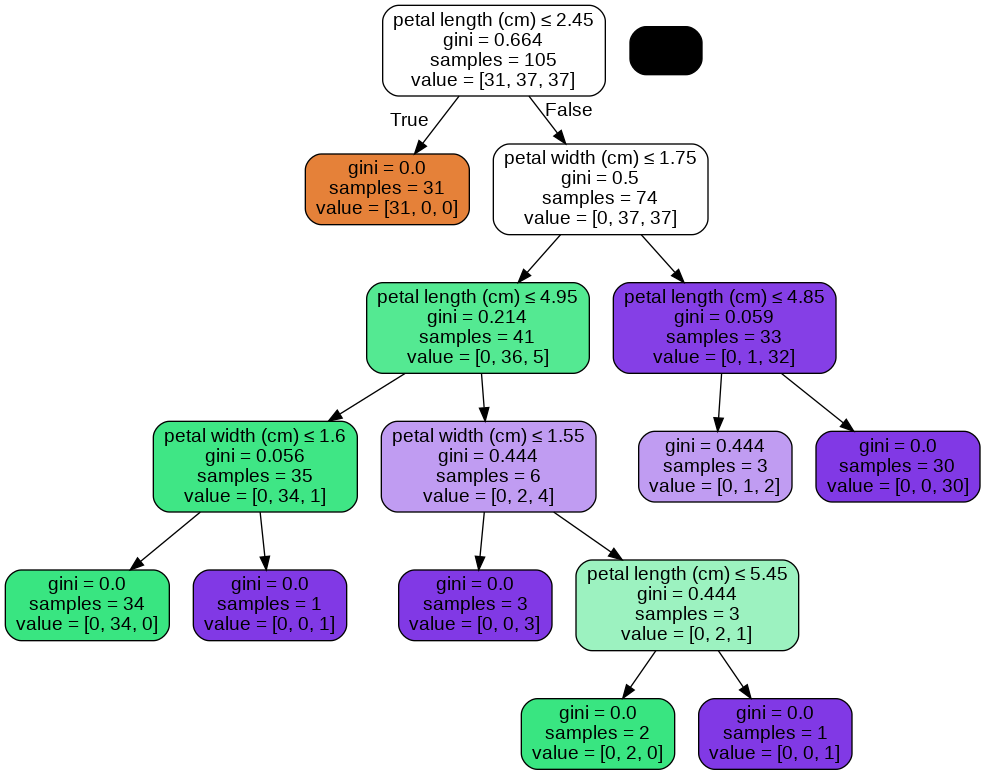

In [6]:
draw_decision_tree(clf)

- 위처럼 아무런 매개변수를 지정하지 않은 경우에는 지니지수 이용. (gini=~~가 각 노드에 쓰여있음)
- 지니지수가 0이 될때까지 분리를 진행함.
- 색이 진할수록 지니지수는 낮고, 해당 레이블에 속하는 샘플 데이터가 많음을 의미함. 

- 샘플 수가 1, 2, 등으로 과적합이 된 모습.   

데이터의 영역을 시각화해서 plot으로 확인해보자.

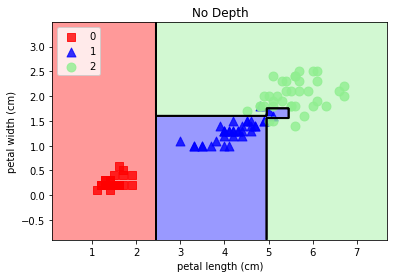

In [7]:
plot_decision_regions(X_train, y_train, clf, 'No Depth')
plt.show()

과적합된 모습을 확인할 수 있다. 

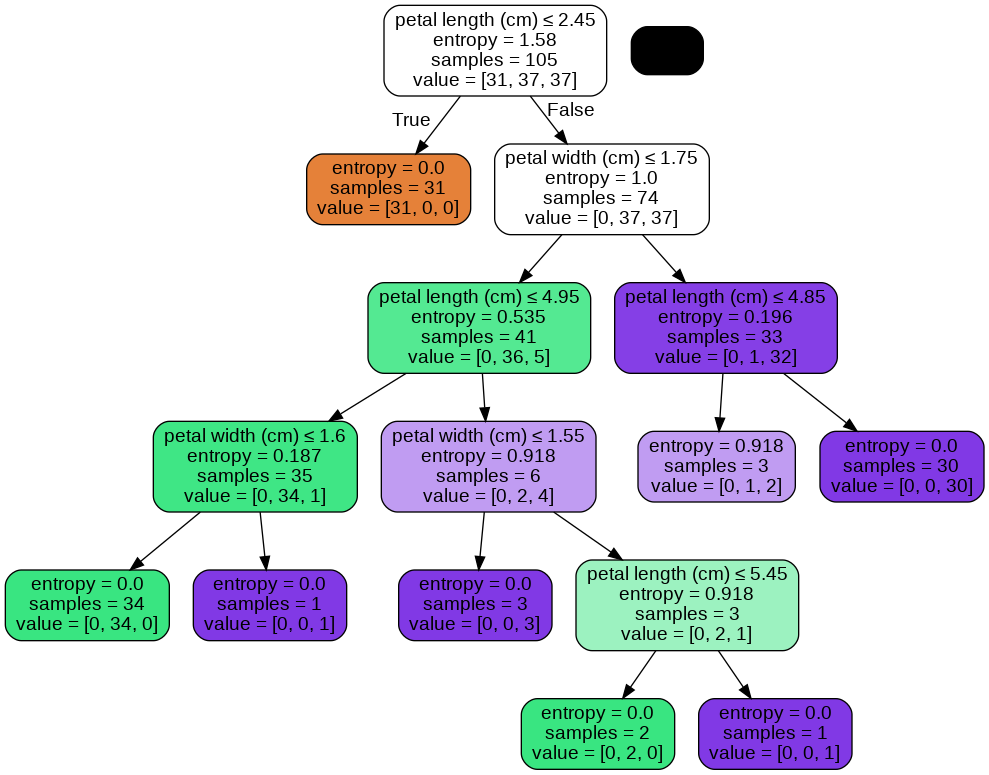

In [8]:
#Entropy를 사용하는 decision tree
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

#모델 적합
clf2 = clf2.fit(X_train, y_train)

#시각화
draw_decision_tree(clf2)

gini 가 entropy로 바뀌었음을 볼 수 있음.  
마찬가지로 max_depth 등을 지정하지 않았기 때문에, 0이 될 때까지 트리 확장

### 가지치기


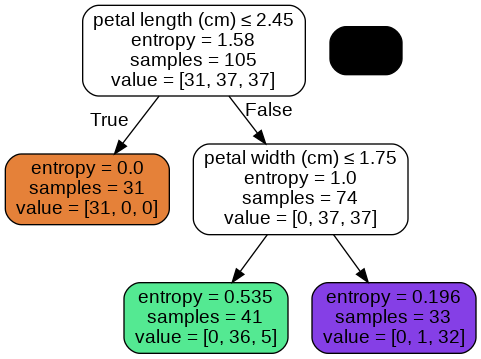

In [9]:
#pruning : 최대 깊이 지정
clf3 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=2, 
                                   random_state=42)

#모델 적합
clf3.fit(X_train, y_train)

#시각화
draw_decision_tree(clf3)

- 이전보다 훨씬 간단해진 모습. 
- 그러나 엔트로피(불순도) 값을 보면 꽤 높다. 이처럼 가지치기를 하면 정확도가 다소 떨어질 수 있기 때문에, 적절한 매개변수를 지정해서 해 주어야 함.  

####지정할 수 있는 매개변수 종류

- criterion : 노드 분리기준으로 'gini', 'entropy' 를 사용
- splitter : 노드 분리방법으로 'random', 'best' 를 사용
- max_depth : 트리의 최대깊이
- Min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
- Min_samples_leaf : leaf 노드가 될 수 있는 샘플 데이터 수의 최솟값
- max_features : 노드를 분리할 때 고려하는 속성의 수로, 'int', 'float', 'auto', 'sqrt','log2', None 이 있으며 각각 다른 방식으로 계산해서 속성의 수를 고려함.

### 결과 평가

In [10]:
iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

model = DecisionTreeClassifier(max_depth=3).fit(X1,y1)
y1_pred = model.predict(X1)

In [11]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y1,y1_pred)

0.8133333333333334

In [12]:
#cv score
from sklearn.model_selection import cross_val_score

cross_val_score(model,X1,y1, scoring='accuracy', cv=5).mean()

0.7466666666666666

train acuuracy와 test accuracy를 같이 그래프로 살펴보면 다음과 같다.

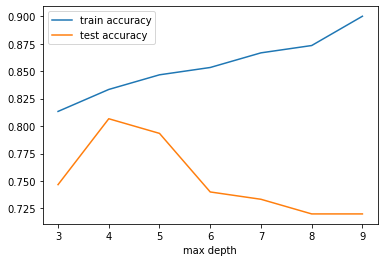

In [13]:
mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model, X1, y1, scoring="accuracy", cv=5).mean())
    
    
line1, = plt.plot(np.arange(3, 10), train_accuracy)
line2, = plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.legend([line1, line2],['train accuracy','test accuracy'])
plt.xlabel('max depth')
plt.show()

최대 깊이가 깊어질수록 과적합되는 모습을 관찰할 수 있다.

#과제 -> SVM 과제와 한꺼번에 제출해주세요!

*사이킷런의 유방암 데이터셋을 사용합니다.*

### 1. 매개변수를 지정하지 않은 모델을 훈련시킨 후 이를 시각화로 나타내주세요. 
(데이터셋을 train test split 함수를 사용해 분리한 후, 모델을 훈련시킵니다.)

### 2. 적절한 매개변수를 지정해 모델을 다시 훈련시키고 이를 시각화한 후, 위 그림과 어떻게 달라졌는지 설명해주세요. 
매개변수를 직접 지정해도 되고, 이전에 배운 GridSearchCV를 사용하셔도 좋습니다. 

### 3. 모델을 평가하는 다양한 지표를 사용해 모델을 평가해주세요.

 (accuracy, loss, 오차행렬, f1 score, recall, cross validation 등등 자유롭게 선택)